<a href="https://colab.research.google.com/github/sukh-brar/prework-study-guide/blob/main/CoCIP_FDR_29_12_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycontrails

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.7 MB/s eta 0:00:00


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 38.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from pycontrails import Flight, MetDataset
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.models.cocip import Cocip
from pycontrails.models.humidity_scaling import ConstantHumidityScaling

plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
time_bounds = ("2022-03-01 00:00:00", "2022-03-01 23:00:00")
pressure_levels = (300, 250, 200)

In [5]:
era5pl = ERA5(
    time=time_bounds,
    variables=Cocip.met_variables + Cocip.optional_met_variables,
    pressure_levels=pressure_levels,
)
era5sl = ERA5(time=time_bounds, variables=Cocip.rad_variables)

In [6]:
!pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=7b8df2a24be8c029dbb7e6e78028686cc5fa26cce78de00adf3f86e090e55fb4
  Stored in directory: /root/.cache/pip/wheels/be/05/e0/65a6edb0a000498aeaefbadd80228bf5ed1bdbb82840ca1692
Successfully built multiurl


In [7]:
!echo "url: https://cds.climate.copernicus.eu/api/" > ~/.cdsapirc
!echo "key: 36f3ae95-e0a3-48ef-92ff-2eb7e1ff908e" >> ~/.cdsapirc

In [8]:
!pip install netcdf4 # Install netcdf4 library

import xarray as xr

# download data from ERA5 (or open from cache)
met = era5pl.open_metdataset(engine="h5netcdf")  # Use h5netcdf engine which supports netcdf4 files
rad = era5sl.open_metdataset(engine="h5netcdf")  # Use h5netcdf engine which supports netcdf4 files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.4 MB/s eta 0:00:00


2024-12-29 07:12:04,195 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-29 07:12:04,200 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

c389f087d48aca0b80ee3746a3165106.nc:   0%|          | 0.00/703M [00:00<?, ?B/s]

2024-12-29 07:18:31,279 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-29 07:18:31,284 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.le

cc78a49258f63c6573a9a7eece3f8095.nc:   0%|          | 0.00/56.2M [00:00<?, ?B/s]

In [9]:
time_bounds = ("2022-03-01 00:00:00", "2022-03-01 23:00:00")
pressure_levels = (300, 250, 200)  # 30,000 ft to 38,000 ft

era5pl = ERA5(
    time=time_bounds,
    variables=Cocip.met_variables + Cocip.optional_met_variables,
    pressure_levels=pressure_levels,
)
era5sl = ERA5(time=time_bounds, variables=Cocip.rad_variables)

In [21]:
!mkdir /data/

In [24]:
attrs = {
    "flight_id": "test",
    "aircraft_type": "B77W",
    "engine_uid": "01P21GE217",  # 01P21GE217 -> GE90-115B
    # "n_engine":2 # This shouldn't be needed?
}

df = pd.read_csv("/content/flight-fdr.csv")


df["fuel_flow"] = df["fuel_flow_1"] + df["fuel_flow_2"]  # Checked
fl = Flight(df, attrs=attrs)

fl = fl.resample_and_fill(freq="60s", drop=False)
fl

Flight [10 keys x 136 length, 3 attributes]
	Keys: longitude, latitude, altitude, time, flight_id, ..., fuel_flow
	Attributes:
	time                [2022-03-01 00:15:00, 2022-03-01 02:30:00]
	longitude           [-39.926, -25.0]
	latitude            [34.0, 39.97]
	altitude            [10900.0, 10900.0]
	flight_id           test
	aircraft_type       B77W
	engine_uid          01P21GE217

In [25]:
perf = PSFlight(met=met)
fp = perf.eval(fl)

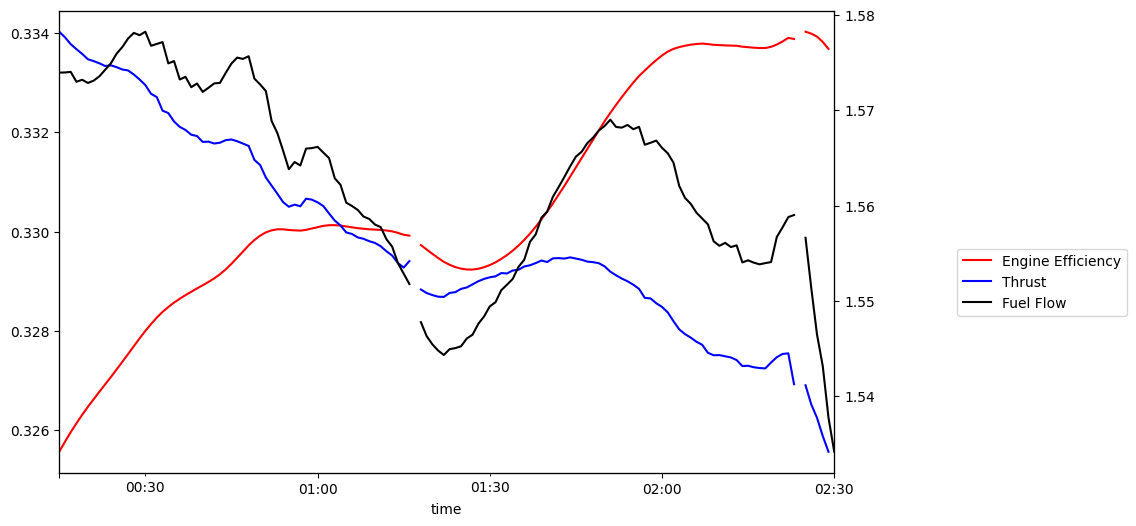

In [26]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax2.twinx()
ax2.set_yticks([])
fp.dataframe.plot(ax=ax, x="time", y="engine_efficiency", style="r", legend=False)
fp.dataframe.plot(ax=ax2, x="time", y="thrust", style="b", legend=False)
fp.dataframe.plot(ax=ax3, x="time", y="fuel_flow", style="k", legend=False)
_ = ax3.legend(
    [ax.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]],
    ["Engine Efficiency", "Thrust", "Fuel Flow"],
    bbox_to_anchor=(1.15, 0.5),
)

In [27]:
emissions = Emissions(met=met, humidity_scaling=HistogramMatching())
fl = emissions.eval(fl)
fl

Flight [31 keys x 136 length, 16 attributes]
	Keys: longitude, latitude, altitude, time, flight_id, ..., nvpm_number
	Attributes:
	time                [2022-03-01 00:15:00, 2022-03-01 02:30:00]
	longitude           [-39.926, -25.0]
	latitude            [34.0, 39.97]
	altitude            [10900.0, 10900.0]
	flight_id           test
	aircraft_type       B77W
	engine_uid          01P21GE217
	n_engine            2
	gaseous_data_source FFM2
	nvpm_data_source    ICAO EDB
	total_co2           39390.76441156896
	total_h2o           15337.3346711712
	total_so2           14.963253337727998
	total_sulphates     0.30537251709648977
	total_oc            0.2493875556288
	total_nox           192.97929090882457
	total_co            2.9152106985266597
	total_hc            0.6230984699140953
	total_nvpm_mass     0.18164446517898938
	total_nvpm_number   3.549745058686995e+18

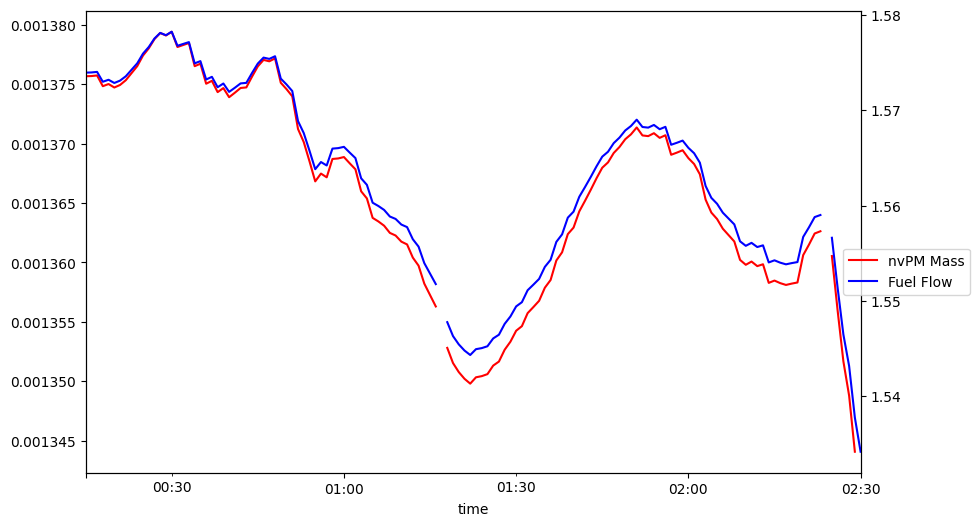

In [28]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fl.dataframe.plot(ax=ax, x="time", y="nvpm_mass", style="r", legend=False)
fl.dataframe.plot(ax=ax2, x="time", y="fuel_flow", style="b", legend=False)
ax2.legend(
    [
        ax.get_lines()[0],
        ax2.get_lines()[0],
    ],
    ["nvPM Mass", "Fuel Flow"],
    bbox_to_anchor=(1.15, 0.5),
)

In [29]:
cocip = Cocip(
    met=met, rad=rad, aircraft_performance=PSFlight(), humidity_scaling=HistogramMatching()
)
fl = cocip.eval(fl)
fl

Flight [67 keys x 136 length, 25 attributes]
	Keys: waypoint, longitude, latitude, altitude, time, ..., cocip
	Attributes:
	time                [2022-03-01 00:15:00, 2022-03-01 02:30:00]
	longitude           [-39.926, -25.0]
	latitude            [34.0, 39.97]
	altitude            [10900.0, 10900.0]
	flight_id           test
	aircraft_type       B77W
	engine_uid          01P21GE217
	n_engine            2
	gaseous_data_source FFM2
	nvpm_data_source    ICAO EDB
	total_co2           39390.76441156896
	total_h2o           15337.3346711712
	total_so2           14.963253337727998
	total_sulphates     0.30537251709648977
	total_oc            0.2493875556288
	total_nox           192.97929090882457
	total_co            2.9152106985266597
	total_hc            0.6230984699140953
	total_nvpm_mass     0.18164446517898938
	total_nvpm_number   3.549745058686995e+18
	aircraft_performance_modelPSFlight
	aircraft_type_ps    B77W
	wingspan            64.8
	max_mach            0.89
	max_altitude        13136.900000976
	total_fuel_burn     12469.37778144
	humidity_scaling_namehistogram_matching
	humidity_scaling_formulaera5_quantiles -> iagos_quantiles
	pycontrails_version 0.54.5

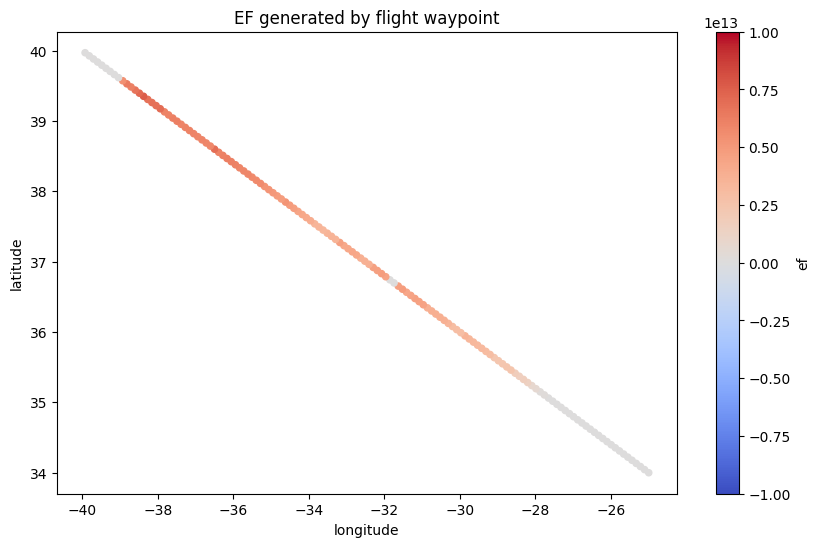

In [30]:
fl.dataframe.plot.scatter(
    x="longitude",
    y="latitude",
    c="ef",
    cmap="coolwarm",
    vmin=-1e13,
    vmax=1e13,
    title="EF generated by flight waypoint",
);

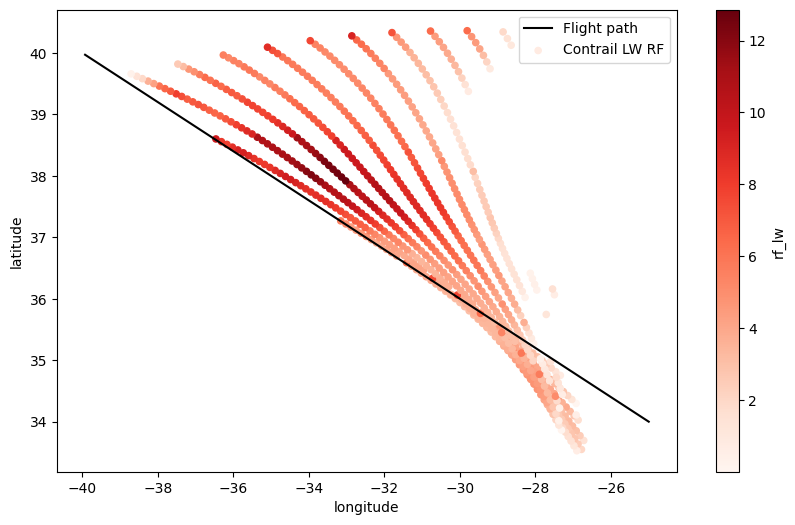

In [31]:
ax = plt.axes()

cocip.source.dataframe.plot(
    "longitude",
    "latitude",
    color="k",
    ax=ax,
    label="Flight path",
)
cocip.contrail.plot.scatter(
    "longitude",
    "latitude",
    c="rf_lw",
    cmap="Reds",
    ax=ax,
    label="Contrail LW RF",  # Contrail age?
)
ax.legend();